# Import Libraries 

In [1]:
import psutil,os,time
import matplotlib.pyplot as plt
import numpy as np

# System Monitoring

## Ram

In [2]:
def get_ram_usage():
    return psutil.virtual_memory().percent

## CPU

In [3]:
def get_cpu_usage():
    return psutil._percent(interval=1)

## Processes

In [4]:
def get_process_data():
    # return all processes with there pid, name, ram usage, memory usage, status, and create time in a dictionary
    process_data={}
    for proc in psutil.process_iter(['pid', 'name', 'ram_percent', 'memory_percent', 'status', 'create_time']):
        process_data[proc.info['pid']] = proc.info
    return process_data

## Get the data

In [5]:
for i in range(10):
    print(f"CPU Usage: {get_ram_usage()}%")
    print(f"RAM Usage: {get_ram_usage()}%")
    print(get_process_data())
    time.sleep(1)

CPU Usage: 7.0%
RAM Usage: 76.7%
{1: {'pid': 1, 'create_time': 1719986555.83, 'cpu_percent': 0.0, 'memory_percent': 0.2888550514222697, 'name': 'systemd', 'status': 'sleeping'}, 2: {'pid': 2, 'create_time': 1719986555.92, 'cpu_percent': 0.0, 'memory_percent': 0.03531012712657517, 'name': 'init-systemd(Ub', 'status': 'sleeping'}, 7: {'pid': 7, 'create_time': 1719986556.91, 'cpu_percent': 0.0, 'memory_percent': 0.003439955078233684, 'name': 'init', 'status': 'sleeping'}, 51: {'pid': 51, 'create_time': 1719986558.05, 'cpu_percent': 0.0, 'memory_percent': 0.33994850184897585, 'name': 'systemd-journald', 'status': 'sleeping'}, 74: {'pid': 74, 'create_time': 1719986558.48, 'cpu_percent': 0.0, 'memory_percent': 0.14528751448069324, 'name': 'systemd-udevd', 'status': 'sleeping'}, 90: {'pid': 90, 'create_time': 1719986558.64, 'cpu_percent': 0.0, 'memory_percent': 0.004654056870551455, 'name': 'snapfuse', 'status': 'sleeping'}, 92: {'pid': 92, 'create_time': 1719986558.66, 'cpu_percent': 0.0, 'm

## save the data

In [6]:
import json

In [20]:

for i in range(1000):
    data={
        "cpu": get_cpu_usage(),
        "ram": get_ram_usage(),
        "processes": get_process_data()
    }
    with open("data.json", "a") as f:
        f.write(json.dumps(data))
        f.write("\n")
    time.sleep(3)

It will take approximately 10.0 minutes to get 10000 samples.
Time per sample: 0.06 seconds


KeyboardInterrupt: 

In [21]:
cpu_data=[]
ram_data=[]
with open('data.json', 'r') as file:
    for line in file:
        data=json.loads(line)
        cpu_data.append(data['cpu'])
        ram_data.append(data['ram'])
print(cpu_data)
print(ram_data)

[2.7, 1.7, 59.9, 3.7, 33.7, 0.5, 5.7, 5.3, 5.8, 68.5, 38.7, 62.2, 1.8, 1.5, 37.7, 88.8, 83.9, 83.6, 94.6, 92.6, 62.7, 54.6, 68.3, 52.7, 56.0, 69.7, 75.4, 97.0, 65.9, 57.9, 98.2, 89.0, 80.4, 83.2, 99.7, 62.6, 56.4, 56.4, 97.0, 60.5, 62.3, 93.6, 19.7, 91.5, 87.1, 66.1, 0.7, 42.1, 0.8, 9.0, 95.2, 62.9, 37.3, 52.1, 63.6, 40.3, 39.8, 52.4, 26.3, 8.1, 43.9, 56.8, 61.2, 70.4, 71.3, 66.8, 55.9, 65.0, 53.6, 46.2, 57.8, 73.1, 36.5, 25.6, 92.5, 62.7, 40.0, 39.9, 27.6, 11.8, 27.8, 28.4, 16.0, 67.5, 57.8, 59.3, 55.6, 61.2, 49.0, 49.2, 26.8, 52.9, 56.9, 12.2, 4.2, 32.4, 9.0, 6.2, 28.4, 19.9, 16.5, 65.2, 48.1, 15.4, 10.8, 12.2, 8.2, 4.0, 2.5, 15.4, 40.1, 24.4, 62.0, 13.2, 17.9, 20.8, 29.0, 10.6, 29.9, 59.9, 58.1, 49.2, 58.3, 65.8, 58.5, 61.1, 64.4, 38.3, 39.2, 39.0, 9.5, 41.0, 15.7, 39.4, 15.8, 8.1, 39.4, 68.4, 47.1, 41.7, 64.5, 49.5, 62.2, 56.8, 60.7, 59.1, 62.9, 60.3, 68.4, 40.7, 68.6, 54.1, 51.5, 37.4, 33.2, 36.3, 36.9, 37.0, 38.2, 32.1, 33.4, 33.0, 32.6, 43.5, 38.7, 66.8, 34.6, 34.2, 41.0, 50.6, 

# Plot CPU and RAM

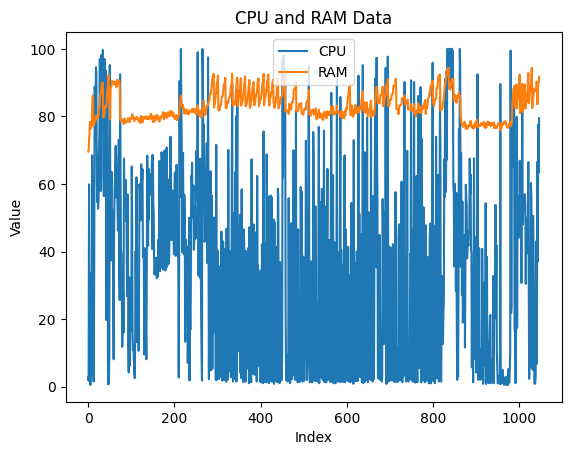

In [22]:

# Create a figure and axes
fig, ax = plt.subplots()

# Plot cpu_data
ax.plot(cpu_data, label='CPU')

# Plot ram_data
ax.plot(ram_data, label='RAM')

# Set labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('CPU and RAM Data')

# Add legend
ax.legend()

# Show the plot
plt.show()


CPU Mean: 33.487010506208215
CPU Std: 28.082876109908582


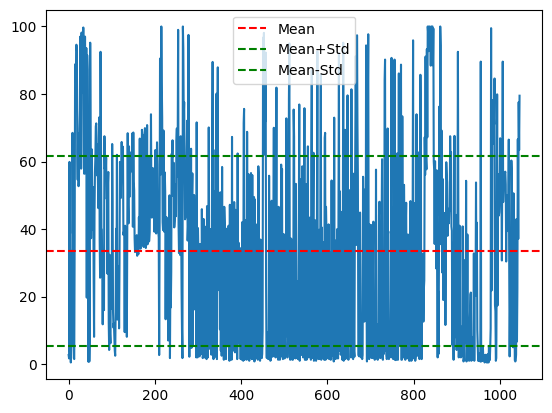

In [23]:
# plot std of cpu
cpu_data=np.array(cpu_data)
cpu_std=cpu_data.std()
cpu_mean=cpu_data.mean()
print(f"CPU Mean: {cpu_mean}")
print(f"CPU Std: {cpu_std}")
plt.plot(cpu_data)
plt.axhline(cpu_mean, color='r', linestyle='--', label='Mean')
plt.axhline(cpu_mean+cpu_std, color='g', linestyle='--', label='Mean+Std')
plt.axhline(cpu_mean-cpu_std, color='g', linestyle='--', label='Mean-Std')
plt.legend()
plt.show()

RAM Mean: 83.06867239732568
RAM Std: 4.151011942609996


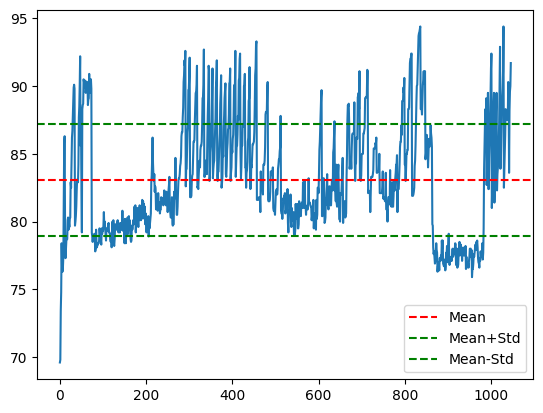

In [24]:
# plot ram std
ram_data=np.array(ram_data)
ram_std=ram_data.std()
ram_mean=ram_data.mean()
print(f"RAM Mean: {ram_mean}")
print(f"RAM Std: {ram_std}")
plt.plot(ram_data)
plt.axhline(ram_mean, color='r', linestyle='--', label='Mean')
plt.axhline(ram_mean+ram_std, color='g', linestyle='--', label='Mean+Std')
plt.axhline(ram_mean-ram_std, color='g', linestyle='--', label='Mean-Std')
plt.legend()
plt.show()

In [34]:
from sklearn.ensemble import IsolationForest

def myanomolies(data):
        # data is 1d array
        clf = IsolationForest(random_state=0)
        clf.fit(data.reshape(-1, 1))
        anomaly_indices = np.where(clf.predict(data.reshape(-1, 1)) == -1)[0]
        return anomaly_indices
    

In [36]:
# print(myanomolies(cpu_data))
print(myanomolies(ram_data))


[   2    3    4    5    7    8    9   15   16   17   18   19   22   23
   25   26   27   28   29   30   31   32   33   34   38   39   41   42
   43   44   45   46   48   49   50   51   53   54   57   58   59   62
   63   64   65   67   68   69   70   71   73   74   78   79   80   81
   82   83   84   85   86   87   88   89   90   91   92   93   94   95
   96   97   98   99  100  101  102  103  104  105  106  107  109  111
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  130  132  134  135  137  138  140  144  145  146  147  148  150  151
  152  154  159  160  161  162  165  167  169  170  171  172  173  174
  177  178  179  182  185  190  191  192  194  195  200  201  202  204
  205  206  212  214  215  216  217  220  224  225  231  232  233  236
  237  238  240  241  244  247  248  250  251  253  254  256  259  260
  262  263  265  266  267  268  269  273  275  278  279  281  282  283
  284  285  286  288  290  293  294  295  297  298  301  302  306  307
  308 